# Visualize stock value

In [47]:
from vnstock import *

## 

In [48]:
stock_ls_analysis("VRE,MWG,FRT,DGW", lang='vi')

Mã CP,DGW,FRT,MWG,VRE
Vốn hóa (tỷ),8437,14019,60550,51809
Giá,50500,102900,41400,22800
Số phiên tăng/giảm liên tiếp,-1,-2,-2,-2
P/E,20.1,-93.3,86.9,12.5
PEG,-0.4,0.8,-1.0,0.1
P/B,3.2,8.2,2.6,1.4
EV/EBITDA,15.6,64.1,16.8,8.0
Cổ tức,0.027,0.0,0.012,0.0
ROE,0.173,-0.083,0.03,0.119
ROA,0.062,-0.014,0.012,0.098


In [49]:
from indices_helper import *
import importlib
import indices_helper

importlib.reload(indices_helper)

def analysis_stock(symbol, days=500):
    df_data = get_stock_price(symbol, days)
    draw_ma(symbol, days)

    visualize_rsi(df_data)

    bollinger_bands_plot(df_data, 20, 2)

    draw_macd(df_data)

    draw_stochastic(df_data)

    draw_obv(df_data)

In [50]:
import importlib
import indices_helper
importlib.reload(indices_helper)
indices_helper.draw_ma('VPB', 180)


ValueError: If using all scalar values, you must pass an index

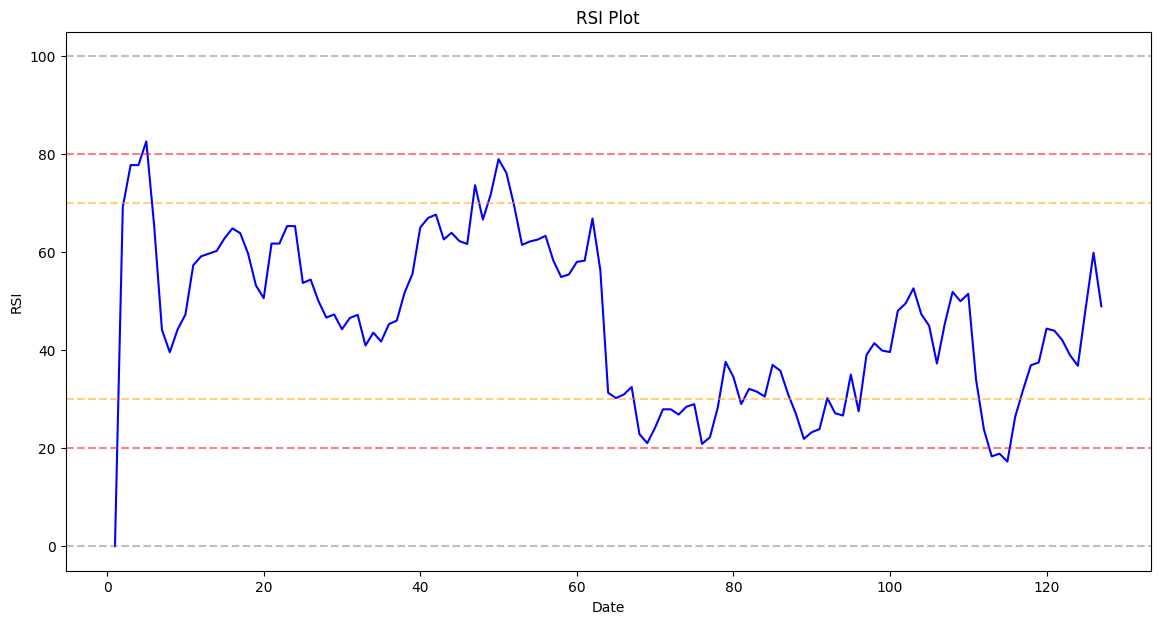

In [ ]:
analysis_stock('VHM', 180)

## Draw chart multi ticket for compare.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def get_price_multi_ticker(tickers, num_days):
    df = pd.DataFrame()
    for ticker in tickers:
        df_ticker = get_stock_price(ticker, num_days)
        df_ticker['ticker'] = ticker
        df = df.append(df_ticker)

    return df


def draw_chart_muti_ticker(tickers, num_days):
    df = get_price_multi_ticker(tickers, num_days)

    # Create subplots
    fig = make_subplots(rows=2, cols=1)
    
    # Loop over tickers and add candlestick chart to subplot
    for i, ticker in enumerate(tickers, start=1):
        df_ticker = df[df['ticker'] == ticker]
        if i == 1:
            fig.add_trace(go.Candlestick(x=df_ticker['time'],
                                     open=df_ticker['open'],
                                     high=df_ticker['high'],
                                     low=df_ticker['low'],
                                     close=df_ticker['close'],
                                     name=ticker
                                    ),
                      row=1, col=1)
            # Add volume bar chart
            fig.add_trace(go.Bar(x=df_ticker['time'], y=df_ticker['volume'], marker=dict(color='blue'), name='Volume'),
                        row=2, col=1)
        else:
            fig.add_trace(go.Scatter(x=df_ticker['time'], y=df_ticker['close'], mode='lines',
                name=ticker),
              row=1, col=1)
    

    fig.update_layout(xaxis_rangeslider_visible=False)
    fig.show()

# Get unique tickers
tickers = ['EIB', 'TPB', 'VPB']

draw_chart_muti_ticker(tickers, 180)

/var/folders/g6/37kt02914kx36yzcbbqfyck00000gn/T/ipykernel_93123/3252743955.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/g6/37kt02914kx36yzcbbqfyck00000gn/T/ipykernel_93123/3252743955.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/g6/37kt02914kx36yzcbbqfyck00000gn/T/ipykernel_93123/3252743955.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

